In [1]:
import pandas as pd

table = pd.read_csv('Table.txt', sep='\t', header=(0))

In [2]:
# Remove columns not used for identification
table.index = table.iloc[:, 0]
table = table.iloc[:, 4:12 ]
genes = table.index
cols = table.columns

In [3]:
# Impute the mean along each column for missing values
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)  
imputer = imputer.fit(table)
table = imputer.transform(table)

c:\users\zoheb\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
# Convert back to pandas dataframe with inputed values
table = pd.DataFrame(data=table, index=genes, columns=cols)

0.8070978988006428


Text(0,0.5,'Explained Variance Ratio')

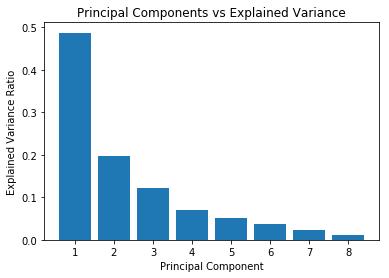

In [7]:
# Perform PCA on data
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import matplotlib as mpl

pca = PCA()
pca.fit(table.iloc[:, 0:9].values)
print(sum(pca.explained_variance_ratio_[0:3]))
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
ax.bar(['1', '2', '3', '4', '5', '6', '7', '8'], pca.explained_variance_ratio_)
ax.set_title('Principal Components vs Explained Variance')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')

Based on the above figure, the top 3 principal components explain 80.7% of variance. These components will be graphed to visually represent the data.

In [6]:
import pandas as pd
# Create Validation Function to judge different classification models

validationTable = pd.read_csv('Table.txt', sep='\t', header=(0))
validationTable.index = validationTable.iloc[:, 0]
validationTable = validationTable.iloc[:, 12:15]
validationTable = validationTable[(validationTable.loc[:, 'Lelandais Target'] == 1) | 
                      (validationTable.loc[:, 'Roetzer Target'] == 1) | 
                      (validationTable.loc[:, 'Kuo Target'] == 1)]
targetGenes = validationTable.index

# Def: This function will take the clusters from the KMeans output and find the most overlapped
# cluster with the reference set and return the amount of correct (common) and incorrect (uncommon)
# genes between the most overlapped (mostCommonClass) cluster and the reference set.
def validate(prediction):
    temp = table.copy(deep=True)
    temp = pd.DataFrame(data=temp)
    temp['Prediction'] = pd.Series(prediction, index=temp.index)
    
    # Determine classes of target genes
    classes = []
    for gene in targetGenes:
        classes.append(temp.loc[gene, 'Prediction'])
    
    # Find most common class, use this as basis for testing
    mostCommonClass = max(set(classes), key=classes.count)
    correct = classes.count(mostCommonClass)
    
    # How many in this class weren't in target list
    incorrect = temp[temp.loc[:, 'Prediction'] == mostCommonClass].shape[0] - correct
    
    return (correct, incorrect)

In [5]:
from sklearn.cluster import KMeans

# Clustering

def clustering(numOfClusters):
    kmeans = KMeans(n_clusters= numOfClusters, random_state=7).fit(table.iloc[:, 0:9].values)
    pred = kmeans.predict(table.iloc[:, 0:9].values)
    return pred

In [8]:
correct = []
incorrect = []
ran = range(2,20)
for i in ran:
    pred = clustering(i)
    out1, out2 = validate(pred)
    correct.append(out1)
    incorrect.append(out2)


Text(0,0.5,'Number of Genes')

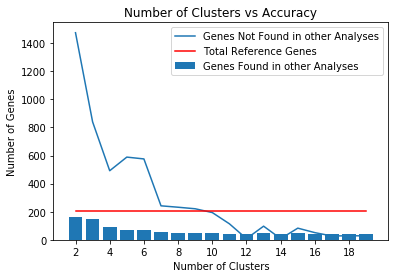

In [9]:
referenceLine = np.zeros(18)
referenceLine.fill(206)

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
ax.bar(ran, correct, label = 'Genes Found in other Analyses')
ax.plot(ran, incorrect, label = 'Genes Not Found in other Analyses')
ax.plot(ran, referenceLine, 'r', label = 'Total Reference Genes')
ax.legend()
ax.set_xticks([2,4,6,8,10,12,14,16,18], minor=False)
ax.set_title('Number of Clusters vs Accuracy')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Genes')

42.0 8.0


Text(0,0.5,'Ratio of Found/NotFound')

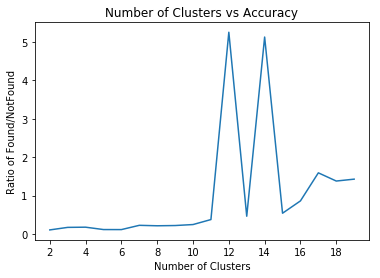

In [10]:
corr = np.array(correct, dtype=np.float64)
incorr = np.array(incorrect, dtype = np.float64)
ratio = corr/incorr

print(corr[10], incorr[10])

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
ax.plot(ran, ratio)
ax.set_xticks([2,4,6,8,10,12,14,16,18], minor=False)
ax.set_title('Number of Clusters vs Accuracy')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Ratio of Found/NotFound')

Text(0.5,1,'Data Visualization using 2 Principal Components')

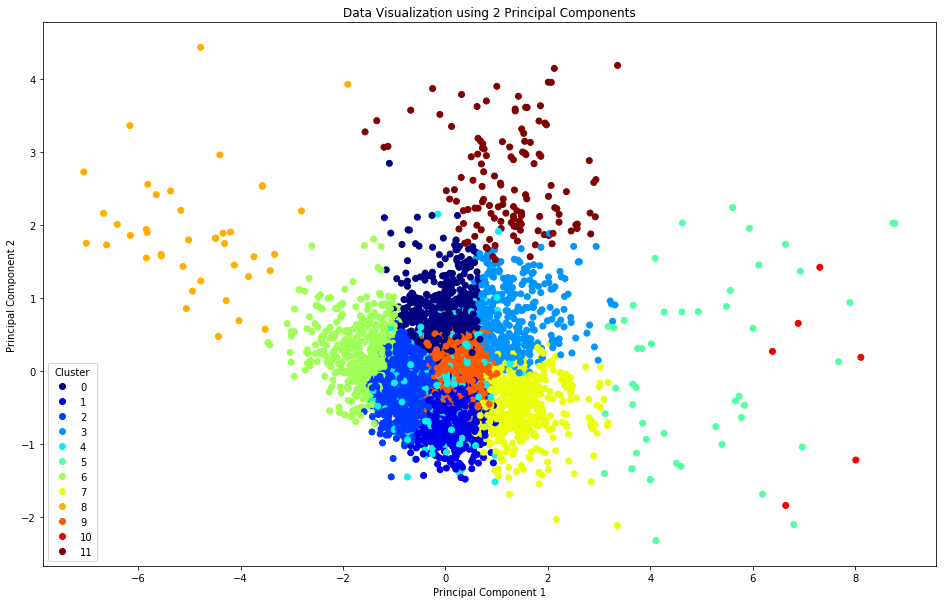

In [50]:
# For 2D Graph

pca = PCA(n_components= 2)
pca_result = pca.fit_transform(table.iloc[:, 0:9].values)

pred = clustering(12)

N = 12
xVal = np.array(pca_result[:, 0])
yVal = np.array(pca_result[:, 1])
groups = np.array(pred)

# cmap code taken from salomonvh on StackOverflow at:
# https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels

N = 12
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(16,10))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)

scatter = ax.scatter(
    pca_result[:, 0], 
    pca_result[:, 1],
    c = pred,
    label = pred,
    cmap = cmap,
    norm = norm)

# Code used for handles taken from ImportanceOfBeingErnest on StackOverflow at:
# https://stackoverflow.com/questions/44164111/setting-a-legend-matching-the-colours-in-pyplot-scatter

labelSet = set(pred) 
handles = [plt.plot([],color=scatter.get_cmap()(scatter.norm(color)),ls="", marker="o")[0] 
           for color in labelSet]
ax.legend(handles, labelSet, title= 'Cluster')


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Data Visualization using 2 Principal Components')

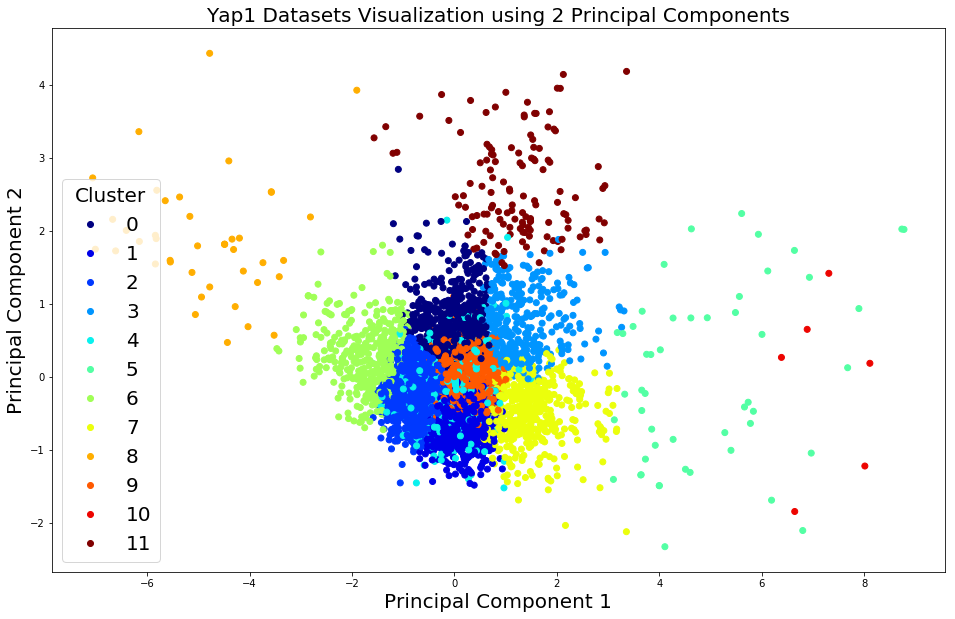

In [17]:
# For poster image, font size needs to be increased

pca = PCA(n_components= 2)
pca_result = pca.fit_transform(table.iloc[:, 0:9].values)

pred = clustering(12)

N = 12
xVal = np.array(pca_result[:, 0])
yVal = np.array(pca_result[:, 1])
groups = np.array(pred)

# cmap code taken from salomonvh on StackOverflow at:
# https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels

N = 12
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(16,10))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)

scatter = ax.scatter(
    pca_result[:, 0], 
    pca_result[:, 1],
    c = pred,
    label = pred,
    cmap = cmap,
    norm = norm)

# Code used for handles taken from ImportanceOfBeingErnest on StackOverflow at:
# https://stackoverflow.com/questions/44164111/setting-a-legend-matching-the-colours-in-pyplot-scatter

labelSet = set(pred) 
handles = [plt.plot([],color=scatter.get_cmap()(scatter.norm(color)),ls="", marker="o")[0] 
           for color in labelSet]
leg = ax.legend(handles, labelSet, prop = {'size': 20}, loc = 'lower left')
leg.set_title('Cluster', prop = {'size': 20})

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Yap1 Datasets Visualization using 2 Principal Components')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)

Text(0.5,0.92,'Data Visualization using 3 Principal Components')

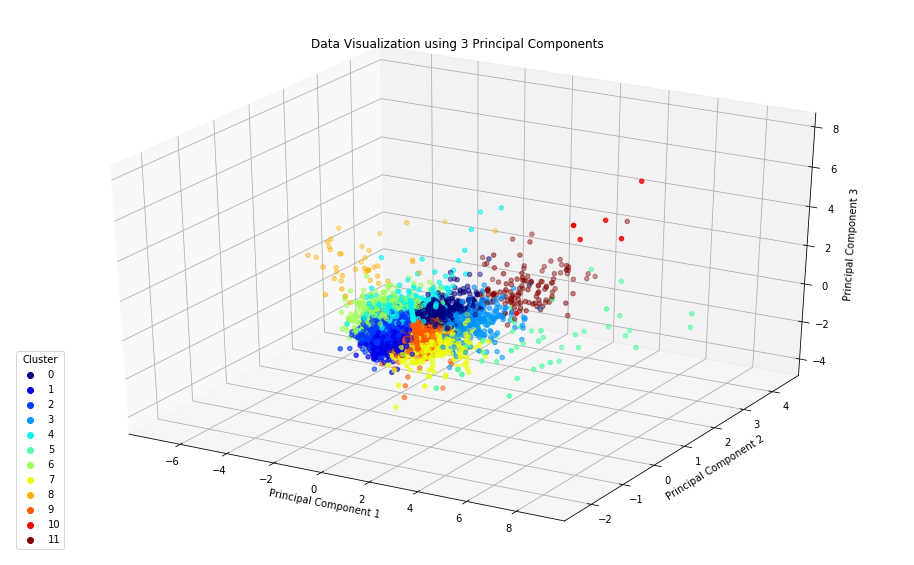

In [53]:
# For 3D Graph

pca = PCA(n_components= 3)
pca_result = pca.fit_transform(table.iloc[:, 0:9].values)

pred = clustering(12)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=pca_result[:, 0], 
    ys=pca_result[:, 1], 
    zs=pca_result[:, 2], 
    c = pred,
    label = pred,
    cmap= cmap,
    norm = norm
)

ax.legend(handles, labelSet, title = 'Cluster', loc = 'lower left')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data Visualization using 3 Principal Components')

In [ ]:
# Save clustering output to table
table['Prediction'] = pd.Series(pred, index=table.index)
print(table)

In [ ]:
# table.to_csv("ClassifiedTable.txt", sep="\t", index=True)
# pd.DataFrame(list(targetGenes)).to_csv("TargetGenes.txt", sep="\t", index=False)